# Esercizio 1

Si estrae per tre volte una carta da un comune mazzo di 52 carte, reinserendola ogni volta nel mazzo.
Sapendo che in un mazzo vi sono 13 carte di cuori, si determini:

1. la probabilità che vengano estratte due carte di cuori;
2. la probabilità che vengano estratte un numero di carte di cuori compreso tra 3 e 5;
3. la probabilità che venga estratta almeno una carta di cuori.

In [16]:
from scipy.stats import binom

n = 3
p = 13 / 52

quesito1 = binom.pmf(2, n, p)
print("Probabilità che vengano estratte due carte di cuori: ", quesito1)

quesito2 = binom.pmf(3, n, p)
print("Probabilità che vengano estratte un numero di carte di cuori compreso tra 3 e 5: ", quesito2)

quesito3 = binom.pmf(1, n, p) + binom.pmf(2, n, p) + binom.pmf(3, n, p)
print("Probabilità che venga estratta almeno una carta di cuori: ", quesito3)

Probabilità che vengano estratte due carte di cuori:  0.14062499999999994
Probabilità che vengano estratte un numero di carte di cuori compreso tra 3 e 5:  0.015625
Probabilità che venga estratta almeno una carta di cuori:  0.578125


# Esercizio 2

Sono stati realizzati 12 lotti di plastica e da ciascun lotto è stato stampato un oggetto di prova, la cui durezza è stata misurata in un momento specifico. I risultati sono mostrati in tabella. Sia \( x \) il tempo trascorso in ore e sia \( y \) la durezza in unità Brinell. Supponiamo che il modello di regressione lineare semplice sia appropriato.

| x  | 32  | 48  | 72  | 64  | 48  | 16  | 40  | 48  | 48  | 24  | 80  | 56  |
|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| y  | 230 | 262 | 323 | 298 | 255 | 199 | 248 | 279 | 267 | 214 | 359 | 305 |


1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si calcoli il coefficiente di determinazione.
2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
3. Si stimi la durezza a 48 ore.
4. Si effettui il test di indipendenza con un livello di significatività alpha = 0.05  commentandone l’esito.


b0:  153.91666666666669 b1:  2.416666666666667
Coefficiente di determinazione:  0.9592688569116763
Intervallo di confidenza di b_0: [135.94310916925266, 171.8902241640807]
Intervallo di confidenza di b_1: [2.0657919055551286, 2.7675414277782053]


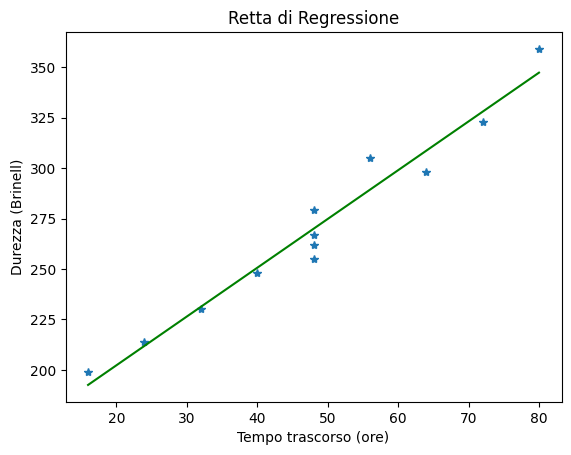

T0 :  15.346412706318565
t: 2.2281388519649385
Rigettiamo l'ipotesi nulla


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

X = np.array([32, 48, 72, 64, 48, 16, 40, 48, 48, 24, 80, 56])
Y = np.array([230, 262, 323, 298, 255, 199, 248, 279, 267, 214, 359, 305])
n = X.size
alpha = 0.05

# Coefficienti della retta di regressione

x_bar = np.mean(X)
y_bar = np.mean(Y)

sig_bar_xy = np.sum((X - x_bar) * (Y - y_bar)) / n
sig_bar_x2 = np.sum((X - x_bar) ** 2) / n

b0 = y_bar - sig_bar_xy / sig_bar_x2 * x_bar
b1 = sig_bar_xy / sig_bar_x2

print("b0: ", b0, "b1: ", b1)

# Coefficente di determinazione

sig_y_2 = np.sum((Y - y_bar) ** 2) / n
R2 = sig_bar_xy**2 / (sig_bar_x2 * sig_y_2)
print("Coefficiente di determinazione: ", R2)

# Intervalli di confidenza al 95%

y_hat = b0 + b1 * X
r = Y - y_hat
s2 = np.sum(r**2) / (n - 2)
s = np.sqrt(s2)
T = t.ppf(1 - alpha / 2, (n - 2))

sig_x = np.sqrt(sig_bar_x2)

b_0_sx = b0 - s * np.sqrt(1 / n + x_bar**2 / (n * sig_bar_x2)) * T
b_0_dx = b0 + s * np.sqrt(1 / n + x_bar**2 / (n * sig_bar_x2)) * T

b_1_sx = b1 - s / (sig_x * np.sqrt(n)) * T
b_1_dx = b1 + s / (sig_x * np.sqrt(n)) * T


print("Intervallo di confidenza di b_0: [{}, {}]".format(b_0_sx, b_0_dx))
print("Intervallo di confidenza di b_1: [{}, {}]".format(b_1_sx, b_1_dx))

# Rappresentazione dei dati

min = np.round(np.min(X))
max = np.round(np.max(X))
assex = np.linspace(min, max, 1000)
assey = b0 + b1 * assex
plt.plot(X, Y, "*")
plt.plot(assex, assey, color="green")
plt.title("Retta di Regressione")
plt.xlabel("Tempo trascorso (ore)")
plt.ylabel("Durezza (Brinell)")
plt.show()

# Test di indipendenza

t = t.ppf(1 - alpha / 2, n - 2)
T = np.abs(np.sqrt(n) * b1 / s * sig_x)
print("T0 : ", T)
print("t:", t)

if T > t:
    print("Rigettiamo l'ipotesi nulla")
else:
    print("Non è possibile rigettare l'ipotesi nulla")

# Esercizio 3

1. Descrivere ed implementare una funzione in Python per generare numeri pseudo-casuali con distribuzione EXP(4) a partire da un generatore di numeri pseudo-casuali con distribuzione uniforme in [0,1].
2. Si generino N = 104di questi numeri e si rappresentino mediante istogramma.
3. Si confronti l’istogramma con il grafico della distribuzione teorica di probabilità della legge EXP(4).


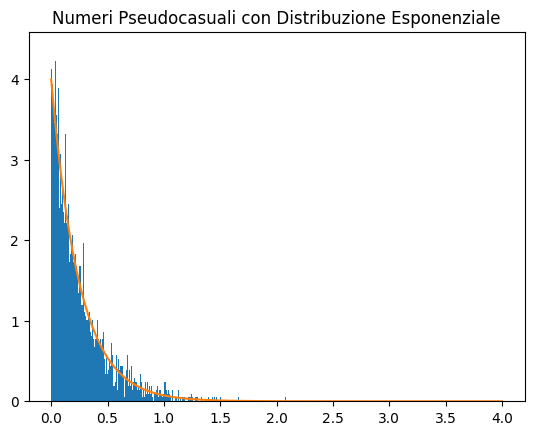

In [18]:
from scipy.stats import expon

lambda_ = 4
n = 10**4

X = np.random.rand(n)
Y = -np.log(X) / lambda_

plt.hist(Y, bins=1000, density=True)
plt.title("Numeri Pseudocasuali con Distribuzione Esponenziale")

assex = np.linspace(0, 4, 1000)
assey = expon.pdf(assex, 0, 1 / lambda_)

plt.plot(assex, assey)
plt.show()